---
title: "More Distributions and the Central Limit Theorem"
format:
  html:
    code-fold: true
jupyter: python3
author: "kakamana"
date: "2023-01-06"
categories: [python, datacamp, statistics, distribution]
image: "chapter3.jpg"

---

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

# **More Distributions and the Central Limit Theorem**

It’s time to explore one of the most important probability distributions in statistics, normal distribution. We’ll create histograms to plot normal distributions and gain an understanding of the central limit theorem, before expanding your knowledge of statistical functions by adding the Poisson, exponential, and t-distributions to your repertoire.

This **More Distributions and the Central Limit Theorem** is part of [Datacamp course: Introduction to Statistic in Python](https://app.datacamp.com/learn/courses/introduction-to-statistics-in-python)

This is my learning experience of data science through DataCamp

The Normal Distribution

* The normal distribution
        * Symmetrical
        * Area = 1
        * Curve never hits 0
        * Described by mean and standard deviation

### **Distribution of Amir's sales**

Since each deal Amir worked on (both won and lost) was different, each was worth a different amount of money. These values are stored in the amount column of amir_deals As part of Amir's performance review, you want to be able to estimate the probability of him selling different amounts, but before you can do this, you'll need to determine what kind of distribution the amount variable follows

In [19]:
amir_deals = pd.read_csv('amir_deals.csv', index_col=0)
amir_deals.head()

,product,client,status,amount,num_users
1,Product F,Current,Won,7389.52,19
2,Product C,New,Won,4493.01,43
3,Product B,New,Won,5738.09,87
4,Product I,Current,Won,2591.24,83
5,Product E,Current,Won,6622.97,17


<AxesSubplot:>

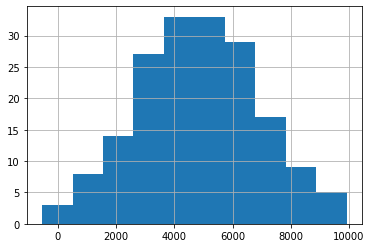

In [20]:
amir_deals['amount'].hist(bins=10)

### **Probabilities from the normal distribution**

Since each deal Amir worked on (both won and lost) was different, each was worth a different amount of money. These values are stored in the amount column of amir_deals and follow a normal distribution with a mean of 5000 dollars and a standard deviation of 2000 dollars. As part of his performance metrics, you want to calculate the probability of Amir closing a deal worth various amounts

In [21]:
# Probability of deal < 7500
prob_less_7500 = norm.cdf(7500,5000,2000)
print(prob_less_7500)

# Probability of deal > 1000
prob_over_1000 =1- norm.cdf(1000, 5000, 2000)
print(prob_over_1000)

# Probability of deal between 3000 and 7000
prob_3000_to_7000 = norm.cdf(7000, 5000, 2000) - norm.cdf(3000, 5000, 2000)
print(prob_3000_to_7000)

# Calculate amount that 25% of deals will be less than
pct_25 = norm.ppf(0.25, 5000, 2000)
print(pct_25)

0.8943502263331446
0.9772498680518208
0.6826894921370859
3651.0204996078364


### **Simulating sales under new market conditions**

The company's financial analyst is predicting that next quarter, the worth of each sale will increase by 20% and the volatility, or standard deviation, of each sale's worth will increase by 30%. To see what Amir's sales might look like next quarter under these new market conditions, you'll simulate new sales amounts using the normal distribution

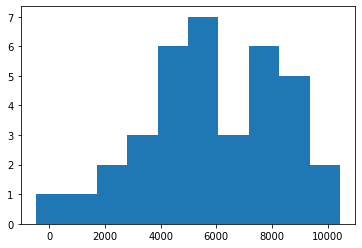

In [22]:
# Calculate new average amount
new_mean = 5000 * 1.2

# Calculate new standard deviation
new_sd = 2000 * 1.3

# Simulate 36 new sales
new_sales = norm.rvs(new_mean,new_sd, 36)

# Create histogram and show
plt.hist(new_sales)
plt.show()

### **The central limit theorem**

    * Sampling Distribution
    * Central limit theorem (CLT)
        * The sampling distribution of a statistic becomes closer to the normal distribution as the number of trials increases
        * Samples should be random and indepdendent

**The CLT in action**

The central limit theorem states that a sampling distribution of a sample statistic approaches the normal distribution as you take more samples, no matter the original distribution being sampled from.

Here we will try on the sample mean and see the central limit theorem in action while examining the num_users column of amir_deals more closely, which contains the number of people who intend to use the product Amir is selling

<AxesSubplot:>

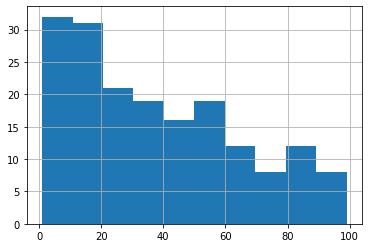

In [23]:
# Create a histogram of num_users and show
amir_deals['num_users'].hist()

32.0


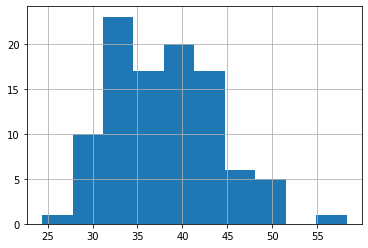


 You've just seen the central limit thorem at work. Even though the distribution of num_users is not normal, the distribution of its sample means resembles the normal distribution


In [25]:
# Set seed to 104
np.random.seed(104)

# Sample 20 num_users with replacement from amir_deals
samp_20 = amir_deals['num_users'].sample(20, replace=True)
# Take the mean of samp_20
print(np.mean(samp_20))

sample_means = []
# Loop 100 times
for i in range(100):
  # Take sample of 20 num_users
  samp_20 = amir_deals['num_users'].sample(20, replace=True)
  # Calculate mean of samp_20
  samp_20_mean = np.mean(samp_20)
  # Append samp_20_mean to sample_means
  sample_means.append(samp_20_mean)

# Convert to Series and plot histogram
sample_means_series = pd.Series(sample_means)
sample_means_series.hist()
# Show plot
plt.show()
print("\n You've just seen the central limit thorem at work. Even though the distribution of num_users is not normal, the distribution of its sample means resembles the normal distribution")

### **The mean of means**

In order to determine whether Amir's deals have more or fewer users than the company's average deal, you want to know the average number of users (num_users) for all deals. Over the past year, the company has worked on more than ten thousand deals, so compiling all the data isn't feasible. To estimate the mean, you will take several random samples of deals since this is much easier than collecting data from everyone.

In [27]:
all_deals = pd.read_csv('all_deals.csv', index_col=0)
all_deals.head()

,product,num_users
Unnamed: 0,,
1,3544,19
2,5073,43
3,6149,87
4,7863,83
5,14,17


In [28]:
# Set seed to 321
np.random.seed(321)

sample_means = []
# Loop 30 times to take 30 means
for i in range(30):
  # Take sample of size 20 from num_users col of all_deals with replacement
  cur_sample = all_deals['num_users'].sample(20,replace=True)
  # Take mean of cur_sample
  cur_mean = np.mean(cur_sample)
  # Append cur_mean to sample_means
  sample_means.append(cur_mean)

# Print mean of sample_means
print(np.mean(sample_means))

# Print mean of num_users in amir_deals
print(amir_deals['num_users'].mean())
print("\n Amir's average number of users is very close to the overall average, so it looks like he's meeting expectations. Make sure to note this in his performance review!")

38.31333333333332
37.651685393258425

 Amir's average number of users is very close to the overall average, so it looks like he's meeting expectations. Make sure to note this in his performance review!


### **The Poisson distribution**

    * Poisson process
        * Events appear to happen at a certain rate, but completely at random
        * Examples
            * Number of animals adopted from an animal shelter per week
            * Number of people arriving at a restaurant per hour
            * Number of earthquakes in California per year
        * Time unit is irrelevant, as long as you use the same unit when talking about the same situation
    * Poisson distribution
        * Probability of some # of events occurring over a fixed period of time
        * Examples
            * Probability of ≥≥ 5 animals adopted from an animal shelter per week
            * Probability of 12 people arriving at a restaurant per hour
            * Probability of << 20 earthquakes in California per year
    * Lambda λλ
        * Average number of events per time interval
    * CLT still applies!

### **Tracking lead responses**

Sales leads are tracked using sales software. It organizes them into a queue so anyone can follow up on one when they have time. This scenario corresponds to a Poisson distribution since lead responses are countable over time. Amir responds to four leads a day on average. This exercise calculates the probability of Amir responding to different numbers of leads.

In [30]:
# Import poisson from scipy.stats
from scipy.stats import poisson

# Probability of 5 responses
prob_5 = poisson.pmf(5,4)
print(prob_5)

# Probability of 5 responses
prob_coworker = poisson.pmf(5,5.5)
print(prob_coworker)

# Probability of 2 or fewer responses
prob_2_or_less = poisson.cdf(2,4)
print(prob_2_or_less)

# Probability of > 10 responses
prob_over_10 = 1-poisson.cdf(10,4)
print(prob_over_10)

0.1562934518505317
0.17140068409793663
0.23810330555354436
0.0028397661205137315
